# PARTE 1

**El fichero Excel adjunto contiene, dos variables: la primera es dicotómica con valores 1 (predinástico temprano) y 2 (predinástico tardío) y la segunda contiene la altura de cráneos (mm.) encontrados en un yacimiento arqueológico. La idea es analizar si existen diferencias en la longitud de la altura de los cráneos egipcios a medida que pasa el tiempo. Creo que mayoritariamente tenemos una idea de que las cabezas egipcias son más alargadas y cuando ya llegamos a los romanos son más redondeadas. El cine se ha encargado de hacer muy gráfico todo esto.**

In [1]:
import pandas as pd  # Import the Pandas library for data manipulation
import numpy as np  # Import the NumPy library for numerical operations
import matplotlib.pyplot as plt  # Import Matplotlib for plotting and visualization
import seaborn as sns  # Import Seaborn for enhanced data visualization
from scipy.stats import kstest, norm  # Import specific functions from SciPy for statistical analysis
from pingouin import ttest  # Import statistical test function from Pingouin

# Set the Seaborn style
sns.set_theme(style='darkgrid', palette="pastel")

# Specify the path to the Excel file containing data
data_location = '.\\Datos.xlsx'

# Load data from the Excel file into a Pandas DataFrame
data_frame = pd.read_excel(data_location)

# Select columns relevant to historical period and skull height
df = data_frame[['Época histórica','Altura del cráneo']]

# Create separate DataFrames for each historical period
df_tem = df[df['Época histórica'] == 1]  # DataFrame for the early historical period
df_tar = df[df['Época histórica'] == 2]  # DataFrame for the late historical period

# Extract skull height data for each historical period
a_tem = df_tem['Altura del cráneo']  # Skull height data for the early historical period
a_tar = df_tar['Altura del cráneo']  # Skull height data for the late historical period

1. Obtener con Python las diferentes medidas de centralización y dispersión, asimetría y curtosis estudiadas. Así mismo, obtener el diagrama de caja y bigotes. Se debe hacer por separado para la submuestra de los cráneos del predinástico temprano y para la submuestra de los del predinástico tardío. Comentar los resultados obtenidos. Estos comentarios son obligatorios.

In [2]:
# Calculating descriptive statistics for the early predynastic period

# Calculate the number of data points in the early predynastic period
tem_len = len(a_tem)

# Calculate the mean (average) of the data for the early predynastic period
tem_mean = np.mean(a_tem)

# Calculate the median of the data for the early predynastic period
tem_median = np.median(a_tem)

# Calculate the standard deviation of the data for the early predynastic period
tem_std = np.std(a_tem)

# Calculate the minimum and maximum values in the data for the early predynastic period
tem_max = a_tem.max()
tem_min = a_tem.min()

# Calculate the range of the data for the early predynastic period
tem_range = tem_max - tem_min  # Note: This might be an error, consider using np.ptp(a_tem) instead

# Calculate the skewness of the data for the early predynastic period
tem_skew = a_tem.skew()

# Calculate the kurtosis of the data for the early predynastic period
tem_kurt = a_tem.kurtosis()

# Display the descriptive statistics for the early predynastic period
print('Predinástico Temprano')
print('Count:\t', tem_len)
print('Mean:\t', tem_mean)
print('Median:\t', tem_median)
print('Std:\t', tem_std)
print('Min:\t', tem_min)
print('Max:\t', tem_max)
print('IQR:\t', tem_range, '\n')

print('Skew:\t', tem_skew)
print('Kurt: \t', tem_kurt)

Predinástico Temprano
Count:	 30
Mean:	 134.4
Median:	 134.0
Std:	 1.051982255870633
Min:	 132
Max:	 137
IQR:	 5 

Skew:	 -0.1737311042975376
Kurt: 	 1.0183245892347403


#### **Comentarios sobre los resultados:**

- *Count (Número de datos):* Hay un total de 30 registros en este conjunto de datos.
- *Mean (Media):* La altura promedio de los cráneos del periodo predinástico temprano es de aproximadamente 134.4 unidades.
- *Median (Mediana):* La mediana de la altura de los cráneos del periodo predinástico temprano es 134.
- *Std (Desviación estándar):* La dispersión de los datos con respecto a la media es de alrededor de 1.05 unidades.
- *Min (Valor mínimo):* El valor más bajo en el conjunto de datos es 132 unidades (altura mínima).
- *Max (Valor máximo):* El valor más alto en el conjunto de datos es 137 unidades (altura máxima).
- *IQR (Rango intercuartílico):* El rango intercuartílico (IQR) de 5 unidades nos indica que el 50% central de los cráneos analizados presenta una variación de 5 unidades. Esto sugiere cierta uniformidad en el tamaño de esta parte de la población.
- *Skew (Asimetría):* El valor de asimetría es aproximadamente -0.17, lo que indica una leve falta de simetría en la distribución, siendo ligeramente sesgada hacia la derecha (colas a la derecha).
- *Kurt (Curtosis):* El valor de curtosis es alrededor de 1.02, lo que indica que la distribución tiene una forma leptocúrtica, es decir, colas más pesadas y más datos cerca de la media en comparación con una distribución normal estándar.

En resumen, estos resultados indican que la altura promedio de los cráneos del periodo predinástico temprano es aproximadamente 134.4 unidades, con una dispersión de alrededor de 1.05 unidades alrededor de esa media. La distribución tiene una ligera asimetría hacia la derecha y una forma un poco más puntiaguda en comparación con una distribución normal estándar.

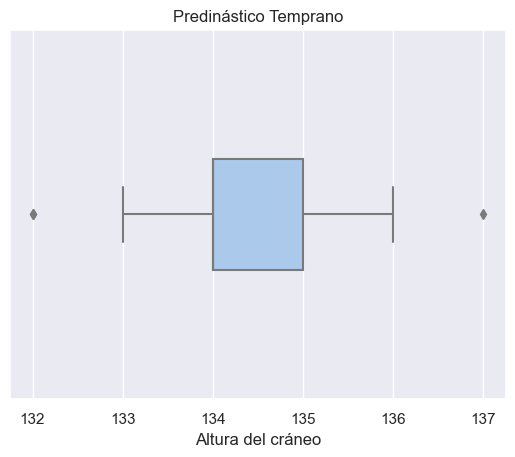

In [3]:
# Generate a boxplot to visualize the distribution of data for the early predynastic period

sns.boxplot(x=a_tem, width=0.3)  # Create a boxplot using Seaborn, 'x' parameter specifies the data, 'width' adjusts the width of boxes

plt.title("Predinástico Temprano")  # Set the title of the boxplot to indicate the early predynastic period

plt.show()  # Display the boxplot


#### **Comentarios sobre los resultados:**

El boxplot refleja una caja reducida con valores atípicos que se distribuyen en ambos lados. No se llega a obsevar la mediana debido a que tiene el valor 134. La concentración de datos alrededor de la media es más evidente en el centro de la caja. Además, los bigotes son relativamente cortos, lo que indica una dispersión limitada de los datos hacia los valores extremos.

In [4]:
# Calculating descriptive statistics for the late predynastic period

# Calculate the number of data points in the late predynastic period
tar_len = len(a_tar)

# Calculate the mean (average) of the data for the late predynastic period
tar_mean = np.mean(a_tar)

# Calculate the median of the data for the late predynastic period
tar_median = np.median(a_tar)

# Calculate the standard deviation of the data for the late predynastic period
tar_std = np.std(a_tar)

# Calculate the minimum and maximum values in the data for the late predynastic period
tar_min = a_tar.min()
tar_max = a_tar.max()

# Calculate the range of the data for the late predynastic period
tar_range = tar_max - tar_min  # Note: This might be an error, consider using np.ptp(a_tar) instead

# Calculate the skewness of the data for the late predynastic period
tar_skew = a_tar.skew()

# Calculate the kurtosis of the data for the late predynastic period
tar_kurt = a_tar.kurtosis()

# Display the descriptive statistics for the late predynastic period
print('Predinástico Tardío')
print('Count:\t', tar_len)
print('Mean:\t', tar_mean)
print('Median:\t', tar_median)
print('Std:\t', tar_std)
print('Min:\t', tar_min)
print('Max:\t', tar_max)
print('IQR:\t', tar_range, '\n')

print('Skew:\t', tar_skew)
print('Kurt: \t', tar_kurt)

Predinástico Tardío
Count:	 30
Mean:	 132.9
Median:	 133.0
Std:	 1.0115993936995675
Min:	 131
Max:	 135
IQR:	 4 

Skew:	 -0.19537866713306773
Kurt: 	 -0.5040834924441051


**Comentarios sobre los resultados:**

- *Count (Número de datos):* Hay un total de 30 registros en este conjunto de datos.
- *Mean (Media):* La altura promedio de los cráneos del periodo predinástico tardío es de aproximadamente 132.9 unidades.
- *Median (Mediana):* La mediana de la altura de los cráneos del periodo predinástico temprano es 133.
- *Std (Desviación estándar):* La dispersión de los datos con respecto a la media es de alrededor de 1.01 unidades.
- *Min (Valor mínimo)*: El valor más bajo en el conjunto de datos es 131 unidades (altura mínima).
- *Max (Valor máximo):* El valor más alto en el conjunto de datos es 135 unidades (altura máxima).
- *IQR (Rango intercuartílico):* El rango intercuartílico (IQR) de 4 unidades nos indica que el 50% central de los cráneos analizados presenta una variación de 4 unidades. Esto sugiere cierta uniformidad en el tamaño de esta parte de la población.
- *Skew (Asimetría):* El valor de asimetría es aproximadamente -0.20, lo que indica una leve falta de simetría en la distribución, siendo ligeramente sesgada hacia la izquierda (colas a la izquierda).
- *Kurt (Curtosis):* El valor de curtosis es alrededor de -0.50, lo que indica que la distribución tiene una forma platicúrtica, es decir, colas menos pesadas y menos datos cerca de la media en comparación con una distribución normal estándar.

En resumen, estos resultados indican que la altura promedio de los cráneos del periodo predinástico tardío es aproximadamente 132.9 unidades, con una dispersión de alrededor de 1.01 unidades alrededor de esa media. La distribución tiene una leve asimetría hacia la izquierda y una forma un poco menos puntiaguda en comparación con una distribución normal estándar.

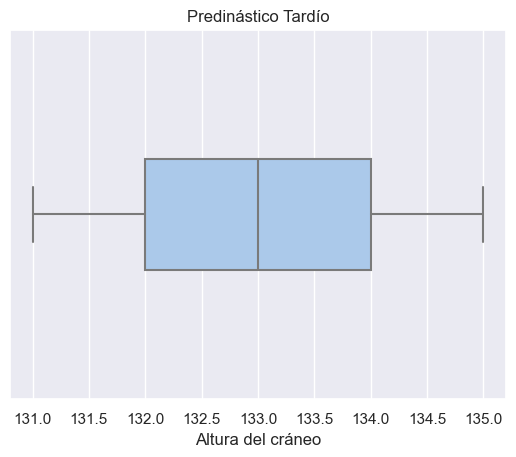

In [5]:
# Generate a boxplot to visualize the distribution of data for the late predynastic period

sns.boxplot(x=a_tar, width=0.3)  # Create a boxplot for the late predynastic period

plt.title("Predinástico Tardío")  # Set title for the late predynastic period boxplot

plt.show()  # Display the boxplot

#### **Comentarios sobre los resultados:**

El boxplot refleja una caja reducida sin valores atípicos. Se observa la mediana con un valor de 133, justo en la mitad del gráfico. La concentración de datos alrededor de la media es más evidente en el centro de la caja, ya que su valor es practicamente el mismo que el de la mediana. Además, los bigotes son relativamente cortos, lo que indica una dispersión limitada de los datos hacia los valores extremos.

2. Determinar si cada una de las dos sub-muestras sigue una distribución normal utilizando el test de Kolmogorov-Smirnov.

In [6]:
# Create a target normal distribution based on early predynastic period statistics
target_dist_tem = norm(loc=tem_mean, scale=tem_std)

# Perform Kolmogorov-Smirnov test comparing the actual data with the target normal distribution
stat, p = kstest(a_tem, target_dist_tem.cdf)
print('stat = %.3f, p = %.3f' % (stat, p))

alpha = 0.05  # Significance level

# Compare the p-value to the significance level and make a decision based on the hypothesis test
if p > alpha:
    print('Los datos parecen normales (no se puede rechazar H0)')
else:
    print('Los datos no parecen normales (se rechaza H0)')

stat = 0.219, p = 0.097
Los datos parecen normales (no se puede rechazar H0)


#### **Comentarios sobre los resultados:**

El valor del estadístico es 0.219 y el p-valor es 0.097. 

Esto significa que:

- *Estadístico de prueba (stat):* Indica la máxima discrepancia entre la distribución teórica (normal) y la distribución de tus datos. Mientras más pequeño sea, más consistente es con la distribución normal.

- *P-valor (p):* Se refiere a la probabilidad de observar esos datos si asumimos que siguen una distribución normal. Un p-valor = 0.097 sugiere que hay un 9.7% de probabilidad de observar estos datos si asumimos que provienen de una distribución normal. Dado que es mayor que el nivel de significancia común (0.05), no se tienen suficientes pruebas para rechazar la hipótesis nula de que los datos siguen una distribución normal.

In [7]:
# Create a target normal distribution based on late predynastic period statistics
target_dist_tar = norm(loc=tar_mean, scale=tar_std)

# Perform Kolmogorov-Smirnov test comparing the actual data with the target normal distribution
stat, p = kstest(a_tar, target_dist_tar.cdf)
print('stat = %.3f, p = %.3f' % (stat, p))

alpha = 0.05  # Significance level

# Compare the p-value to the significance level and make a decision based on the hypothesis test
if p > alpha:
    print('Los datos parecen normales (no se puede rechazar H0)')
else:
    print('Los datos no parecen normales (se rechaza H0)')


stat = 0.206, p = 0.136
Los datos parecen normales (no se puede rechazar H0)


#### **Comentarios sobre el resultado:**

el valor del estadístico es 0.206 y el valor p es 0.136. 

Esto implica:

- *Estadístico de prueba (stat):* Representa la mayor discrepancia entre la distribución teórica (normal) y la distribución de tus datos. Mientras menor sea este valor, mayor será la coherencia con la distribución normal.

- *P-valor (p):* Es la probabilidad de observar los datos si asumimos que siguen una distribución normal. Con un p-valor = 0.136, hay un 13.6% de probabilidad de observar estos datos si provienen de una distribución normal. Dado que este valor es mayor que el nivel de significancia común (0.05), no existen pruebas suficientes para rechazar la hipótesis nula de que los datos se ajustan a una distribución normal.

# PARTE 2

1. Con los mismos datos del ejercicio anterior, obtener un intervalo de confianza (de nivel 0.9, de nivel 0.95 y de nivel 0.99) para la diferencia entre las medias de la altura de la cabeza en ambos periodos históricos. Interpretar los resultados obtenidos y discutirlos en función del test de normalidad del ejercicio anterior. La interpretación debe ser rigurosa desde el punto de vista estadístico y también marcada por el story telling, es decir, comprensible desde el punto de vista de las variables respondiendo a la pregunta ¿en qué época la cabeza era más alta?

In [8]:
# Calculate the difference in means and the standard error of the difference
difference_means = tem_mean - tar_mean
standard_error_difference = np.sqrt((tem_std ** 2) / tem_len + (tar_std ** 2) / tar_len)

# Calculate confidence intervals for different levels
interval_90 = norm.interval(0.9, loc=difference_means, scale=standard_error_difference)
interval_95 = norm.interval(0.95, loc=difference_means, scale=standard_error_difference)
interval_99 = norm.interval(0.99, loc=difference_means, scale=standard_error_difference)

# Print the calculated confidence intervals
print("90% Confidence Interval:", interval_90)
print("95% Confidence Interval:", interval_95)
print("99% Confidence Interval:", interval_99)

90% Confidence Interval: (1.0617151779484324, 1.9382848220515676)
95% Confidence Interval: (0.9777514229131087, 2.0222485770868914)
99% Confidence Interval: (0.8136490266106517, 2.1863509733893483)


#### **Comentario sobre el resultado:**

Los resultados de los intervalos de confianza muestran que la diferencia entre las medias de las alturas de los cráneos entre los periodos predinástico temprano y predinástico tardío es consistente en todos los niveles de confianza (90%, 95% y 99%).

**Específicamente:**

- *Intervalo de Confianza al 90%:* La diferencia entre las medias de las alturas de los cráneos es de 1.06 a 1.94 unidades más alta en el periodo predinástico temprano en comparación con el tardío, con un nivel de confianza del 90%.

- *Intervalo de Confianza al 95%:* La altura de la cabeza es entre 0.98 y 2.02 unidades más alta en el periodo predinástico temprano en comparación con el tardío, con un nivel de confianza del 95%.

- *Intervalo de Confianza al 99%:* La diferencia en las alturas de los cráneos se sitúa entre 0.81 y 2.19 unidades más altas en el periodo predinástico temprano en comparación con el tardío, con un nivel de confianza del 99%.

**Interpretación:**

Independientemente del nivel de confianza seleccionado (90%, 95% o 99%), el resultado sugiere que hay evidencia estadísticamente significativa para afirmar que las alturas de los cráneos eran más altas en el periodo predinástico temprano en comparación con el periodo predinástico tardío. Además, la diferencia es consistente y sustancial en todos los intervalos de confianza considerados, lo que fortalece la confianza en esta conclusión.

2. Utilizar el test t para contrastar la hipótesis de que ambas medias son iguales. Explicar qué condiciones se deben cumplir para poder aplicar ese contraste. Determinar si se cumplen. Admitiremos de forma natural la independencia entre ambas muestras, así que esa condición no hace falta comprobarla.

In [9]:
# Perform an independent samples t-test between early and late predynastic period data
# with a confidence level of 0.9 (90% confidence interval)
t_test_result_90 = ttest(a_tem, a_tar, confidence=0.9)
t_test_result_90

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,5.534781,58,two-sided,7.857638e-07,"[1.0469867629210623, 1.953013237078938]",1.429074,1.663e+04,0.99975


In [10]:
# Perform an independent samples t-test between early and late predynastic period data
# with a confidence level of 0.95 (95% confidence interval)
t_test_result_95 = ttest(a_tem, a_tar, confidence=0.95)
t_test_result_95

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.534781,58,two-sided,7.857638e-07,"[0.96, 2.04]",1.429074,1.663e+04,0.99975


In [11]:
# Perform an independent samples t-test between early and late predynastic period data
# with a confidence level of 0.99 (99% confidence interval)
t_test_result_99 = ttest(a_tem, a_tar, confidence=0.99)
t_test_result_99

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,5.534781,58,two-sided,7.857638e-07,"[0.7782134841732304, 2.22178651582677]",1.429074,1.663e+04,0.99975


#### **Comentario sobre el resultado:**

Los resultados del test t para igualdad de medias muestran que hay una diferencia significativa entre las medias de las alturas de los cráneos para los periodos predinástico temprano y predinástico tardío. Aquí está la interpretación según los diferentes niveles de confianza:

**Resultados para 90%**

- *P-valor:* El p-valor es 7.857638e-07 (muy cercano a cero), mucho menor que el nivel de significancia usual de 0.05, lo que indica una fuerte evidencia en contra de la hipótesis nula (que las medias son iguales).
- *Intervalo de Confianza al 90% (CI90%):* El intervalo va desde 1.05 a 1.95, lo que indica que con un nivel de confianza del 90%, se estima que la diferencia real en las medias de las alturas de los cráneos está entre estos valores.
- *Cohens´d:* El valor es 1.429074, lo que sugiere un tamaño del efecto considerablemente grande.
- *Bayes Factor (BF10):* El valor de 1.663e+04 sugiere una fuerte evidencia a favor de la hipótesis alternativa sobre la nula.
- *Power:* Un poder estadístico de 0.99975 indica una alta probabilidad de detectar una diferencia significativa si realmente existe.

**Resultados para 95%**

- *P-valor:* El p-valor sigue siendo el mismo, indicando la misma fuerte evidencia en contra de la hipótesis nula.
- *Intervalo de Confianza al 95% (CI95%):* El intervalo más amplio, de 0.96 a 2.04, muestra que, con un nivel de confianza del 95%, se estima que la diferencia real en las medias podría variar en este rango.
- *Cohen´s d, BF10, Power:* Estos valores son similares a los obtenidos para el 90%, lo que confirma la robustez de la evidencia.

**Resultados para 99%**

- *P-valor:* El p-valor sigue siendo consistente, confirmando la fuerte evidencia en contra de la hipótesis nula.
- *Intervalo de Confianza al 99% (CI99%)*: Es el intervalo más amplio, variando entre 0.78 y 2.22. A un nivel de confianza del 99%, se estima que la diferencia real en las medias podría estar en este rango más amplio.
- *Cohen´s d, BF10, Power:* Nuevamente, estos valores son consistentes con los obtenidos en los otros niveles de confianza.

En resumen, independientemente del nivel de confianza elegido (90%, 95% o 99%), los resultados del test t indican de manera consistente una diferencia significativa entre las medias de las alturas de los cráneos para los periodos predinástico temprano y tardío. La evidencia es sólida en favor de esta diferencia, respaldada por diferentes métricas y análisis estadísticos, lo que sugiere que las cabezas eran significativamente más altas en el periodo predinástico temprano en comparación con el tardío.